In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
    

In [4]:
def log_Regret_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = np.log10(np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   

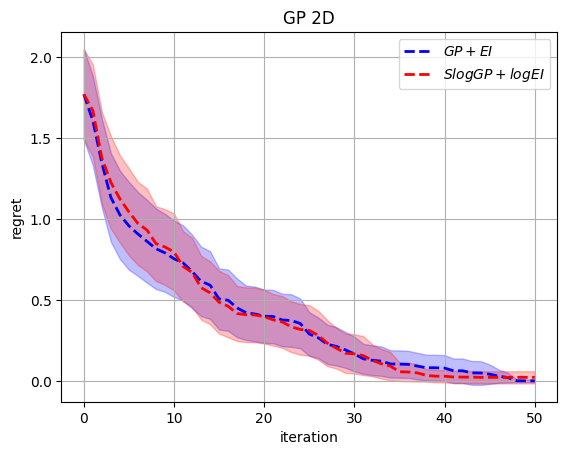

In [3]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/GP2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/GP2D_SlogGP+logEI'), delimiter=',')

fstar = 0.


log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('GP 2D')

plt.savefig('plots/GP5.png')

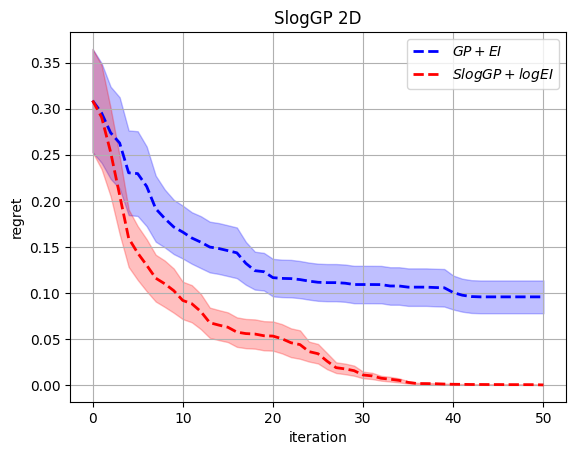

In [3]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SlogGP2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SlogGP2D_SlogGP+logEI'), delimiter=',')

fstar = 0.


log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('SlogGP 2D')

plt.savefig('plots/SlogGP5.png')

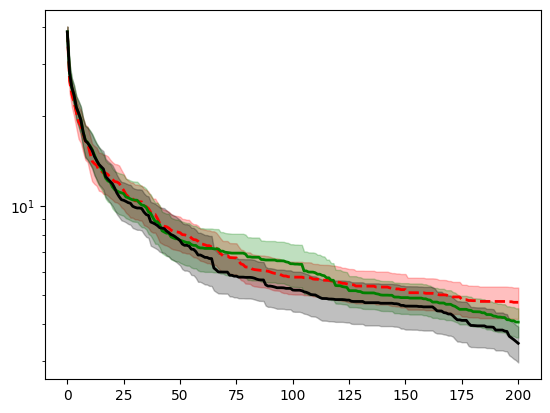

In [4]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

#log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.yscale("log") 


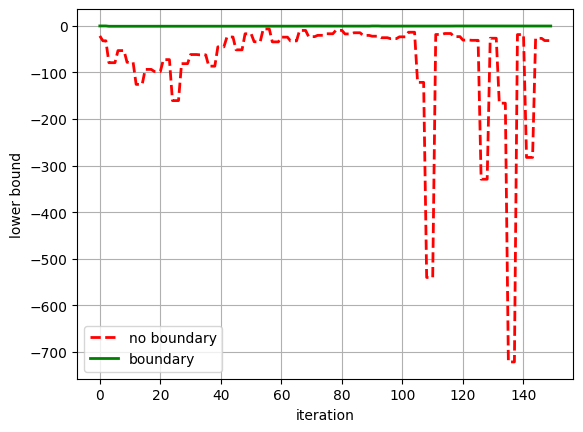

In [13]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Levy10D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
#plt.ylim([-1000,20])

Text(0.5, 1.0, 'StyblinskiTang 10D')

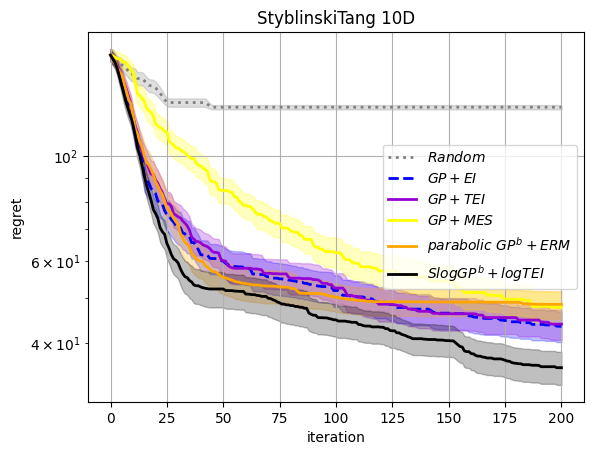

In [4]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =-10*39.166166 

log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

#plt.grid()

plt.yscale("log") 
plt.grid()
plt.legend()
plt.title('StyblinskiTang 10D')

Text(0.5, 1.0, 'StyblinskiTang 10D')

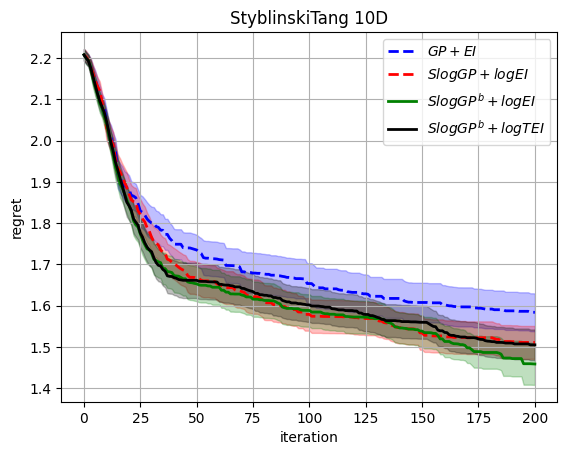

In [30]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI'), delimiter=',')
#SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -10*39.166166 

log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
#log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('StyblinskiTang 10D')

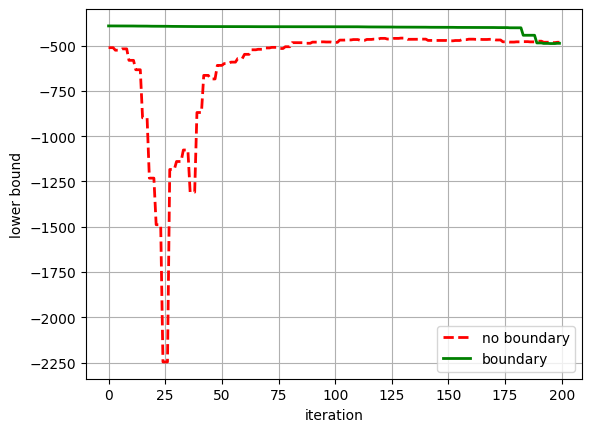

In [16]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/StyblinskiTang10D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

Text(0.5, 1.0, 'Lunar Lander 12D')

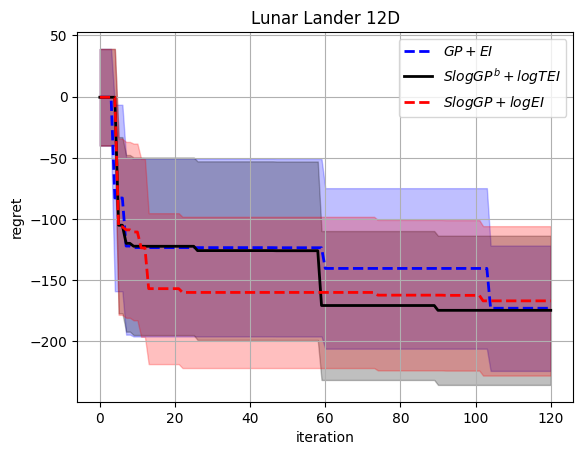

In [3]:
#Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_GP+EI'), delimiter=',')
# BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+TEI'), delimiter=',')
# BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Branin2D_GP+KG'), delimiter=',')
# BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+MES'), delimiter=',')
# BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_SLogGP+logEI'), delimiter=',')
# SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Lunar12D_SLogGP+logEI_otherCase'), delimiter=',')


fstar = 0.

# log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(-BO_KG,fstar=fstar,label='$GP+KG$',color='olive',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
# log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
# log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Lunar Lander 12D')

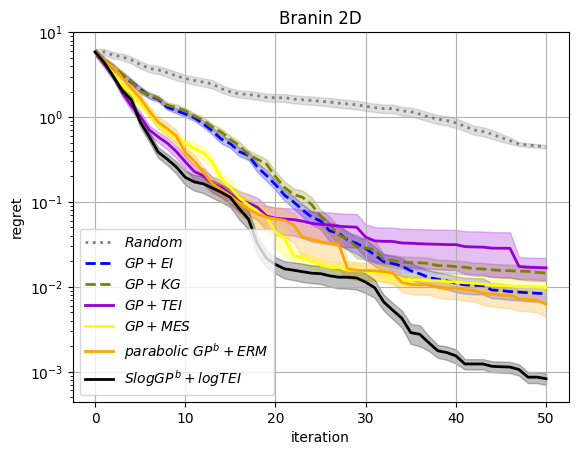

In [3]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+TEI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Branin2D_GP+KG'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.397887

log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='$GP+KG$',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

plt.yscale("log") 
plt.legend()
plt.title('Branin 2D')

plt.savefig('plots/Branin5.png')

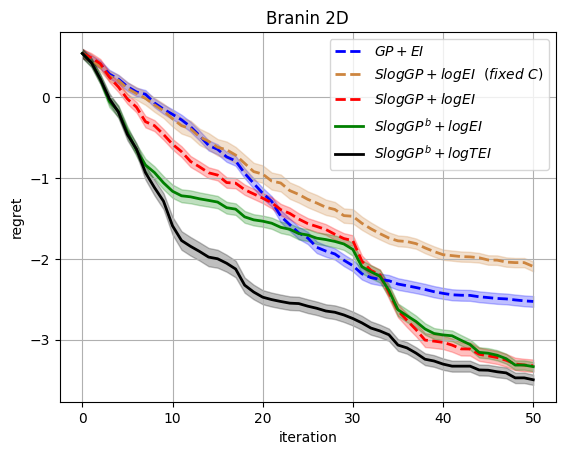

In [9]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.397887

log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Branin 2D')

plt.savefig('plots/Branin6.png')

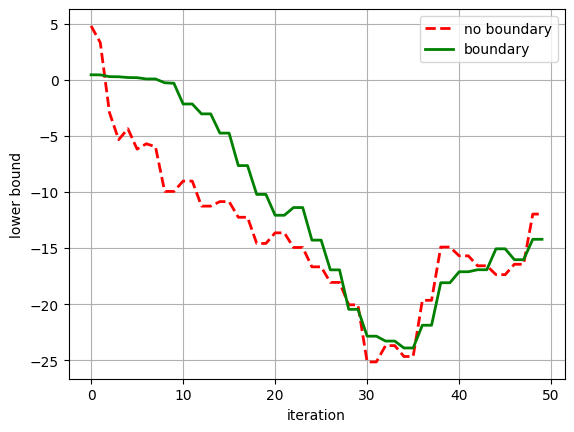

In [45]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Branin2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/Branin7.png')

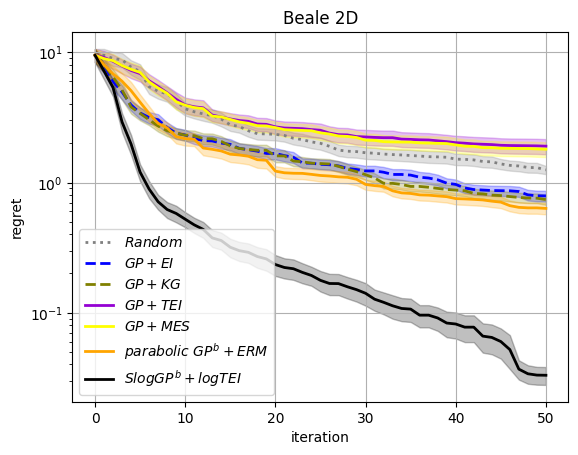

In [3]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+EI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/Beale2D_GP+KG'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='$GP+KG$',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Beale 2D')

plt.savefig('plots/Beale5.png')

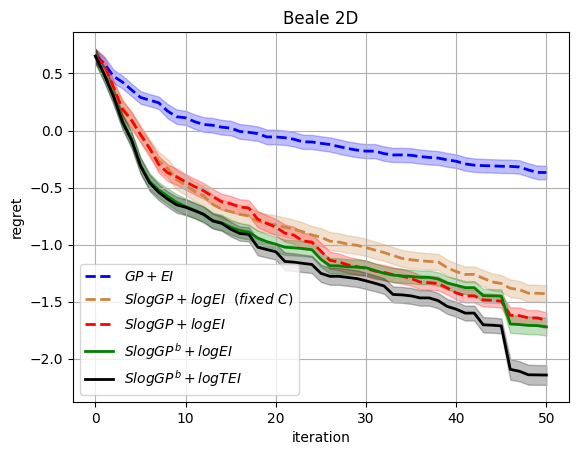

In [13]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
#plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Beale 2D')

plt.savefig('plots/Beale6.png')

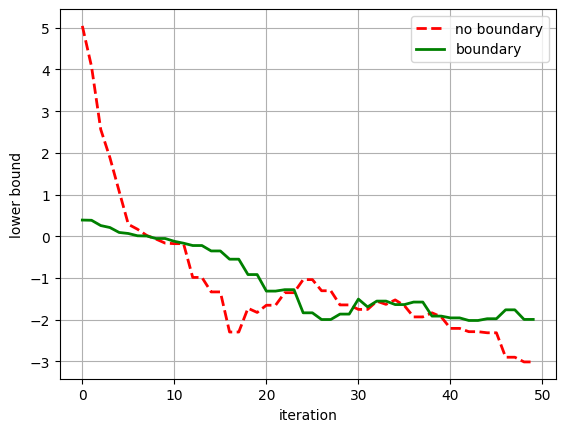

In [6]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Beale2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
plt.savefig('plots/Beale7.png')

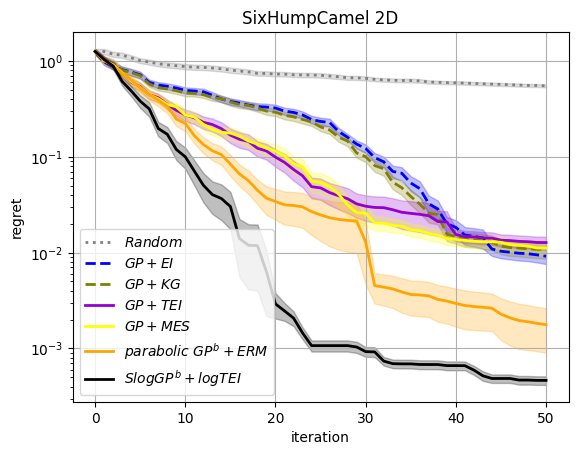

In [4]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+EI'), delimiter=',')
BO_KG = np.genfromtxt(os.path.join(os.getcwd(),'KG/SixHumpCamel2D_GP+KG'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -1.0317

log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(-BO_KG,fstar=fstar,label='$GP+KG$',color='olive',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()
plt.yscale("log") 

plt.legend()
plt.title('SixHumpCamel 2D')

plt.savefig('plots/SixHumpCamel5.png')

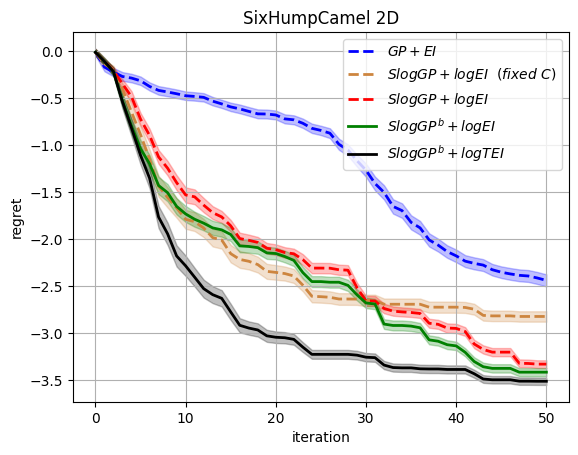

In [16]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = -1.0317


log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
#log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()
#plt.yscale("log") 

plt.legend()
plt.title('SixHumpCamel 2D')

plt.savefig('plots/SixHumpCamel6.png')

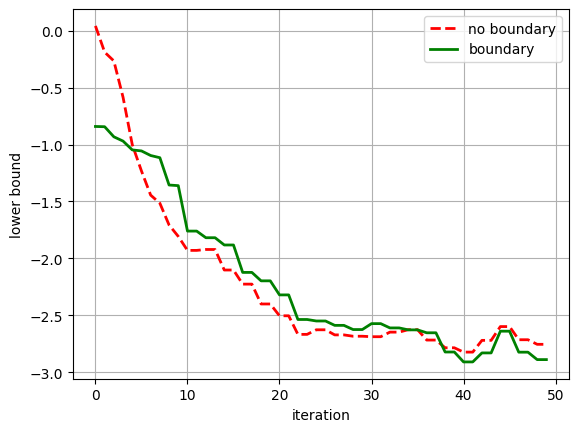

In [49]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/SixHumpCamel2D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.grid()
plt.legend()

plt.grid()
plt.savefig('plots/SixHumpCamel7.png')

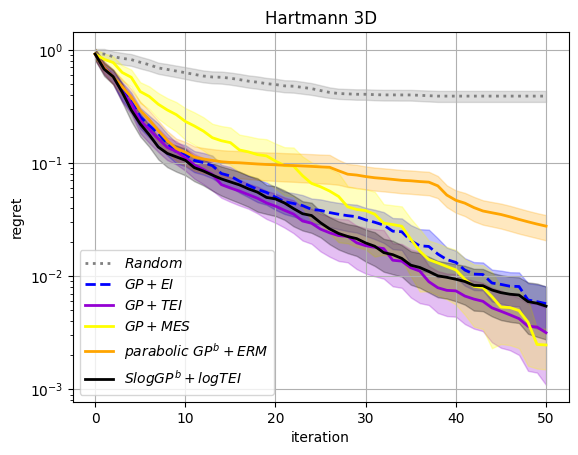

In [14]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  -3.86278


log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Hartmann 3D')

plt.savefig('plots/Hartmann5.png')


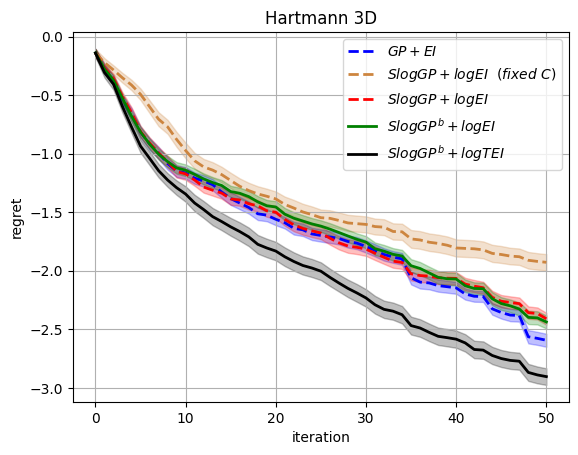

In [20]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  -3.86278

log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
#plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Hartmann 3D')

plt.savefig('plots/Hartmann6.png')

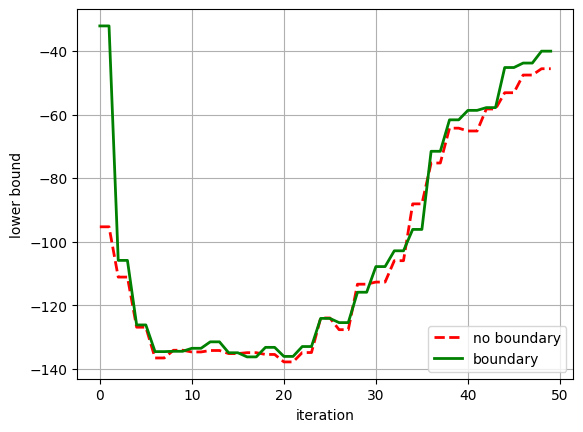

In [51]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Hartmann3D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()


plt.savefig('plots/Hartmann7.png')

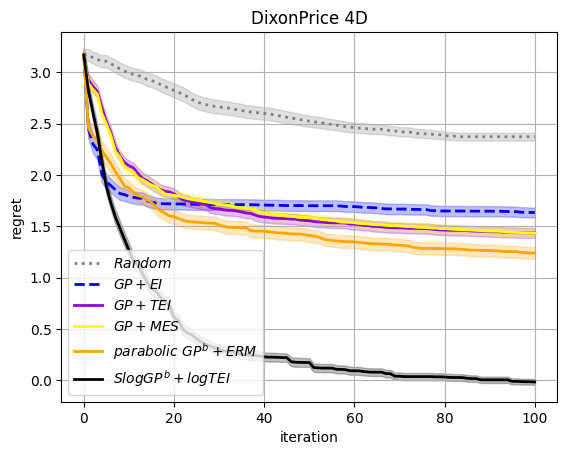

In [18]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  0.


log_Regret_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_Regret_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_Regret_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
#plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('DixonPrice 4D')

plt.savefig('plots/DixonPrice5.png')

In [4]:
np.mean(BO_EI,0)[-1]

67.15499795009048

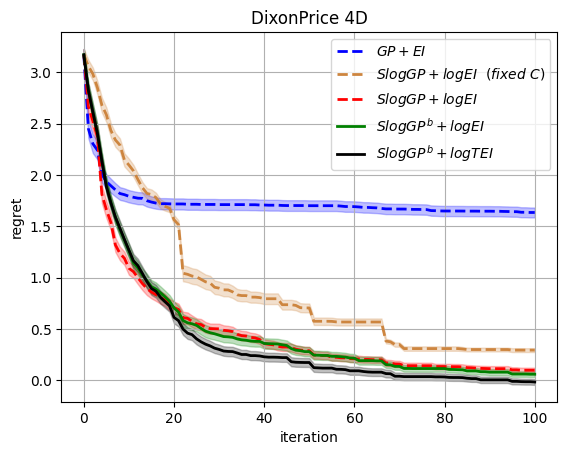

In [22]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  0.

log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
#plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('DixonPrice 4D')


plt.savefig('plots/DixonPrice6.png')

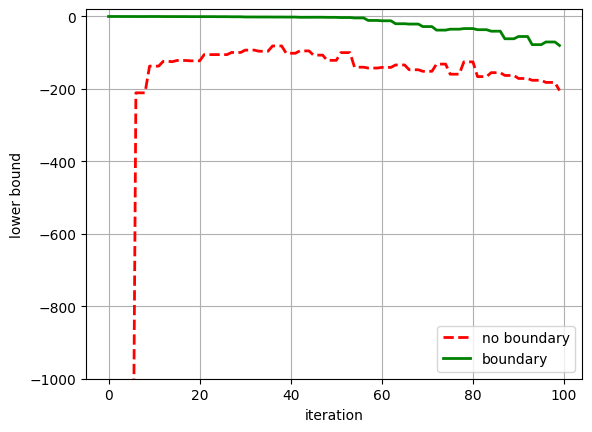

In [53]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/DixonPrice4D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')



median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
plt.ylim([-1000,20])

plt.savefig('plots/DixonPrice7.png')


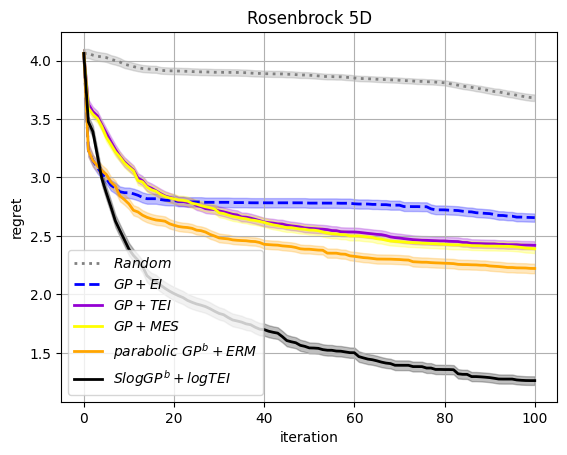

In [24]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_Regret_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_Regret_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_Regret_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Rosenbrock 5D')

plt.savefig('plots/Rosenbrock5.png')

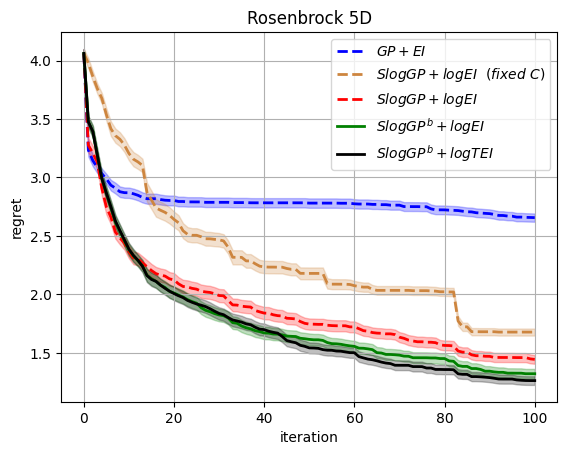

In [25]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Rosenbrock 5D')


plt.savefig('plots/Rosenbrock6.png')


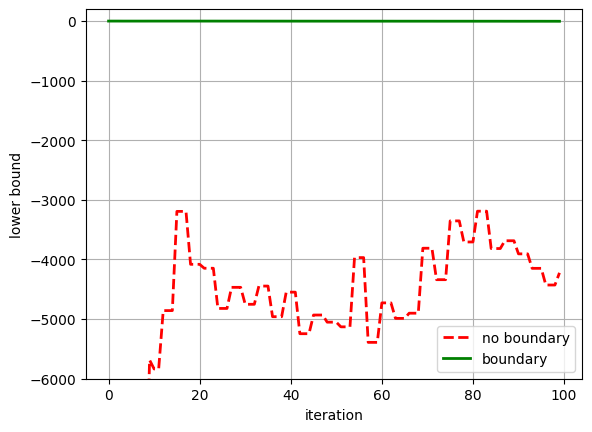

In [55]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Rosenbrock5D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()
plt.ylim([-6000,200])

plt.savefig('plots/Rosenbrock7.png')

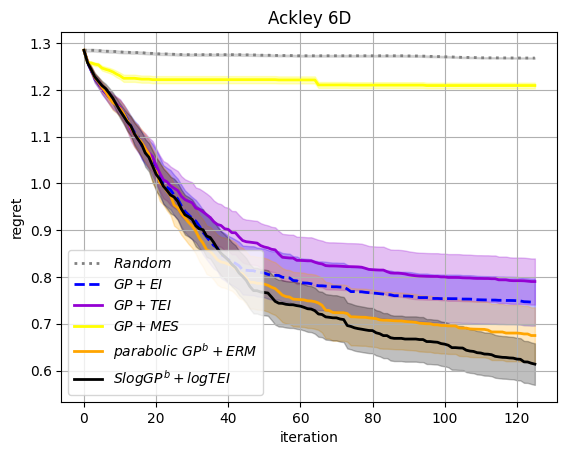

In [26]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_Regret_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_Regret_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_Regret_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Ackley 6D')


plt.savefig('plots/Ackley5.png')

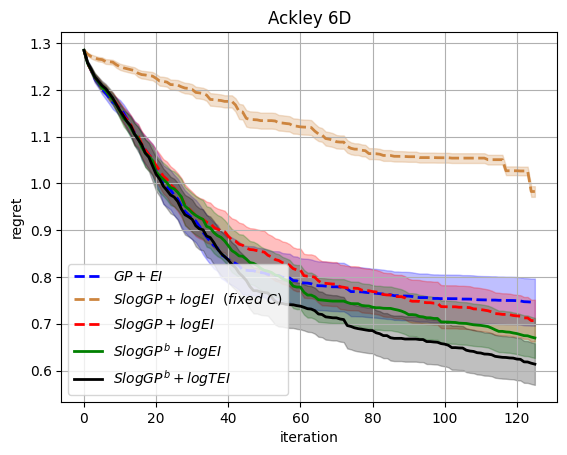

In [27]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')

plt.grid()

#plt.yscale("log") 
plt.legend()
plt.title('Ackley 6D')


plt.savefig('plots/Ackley6.png')

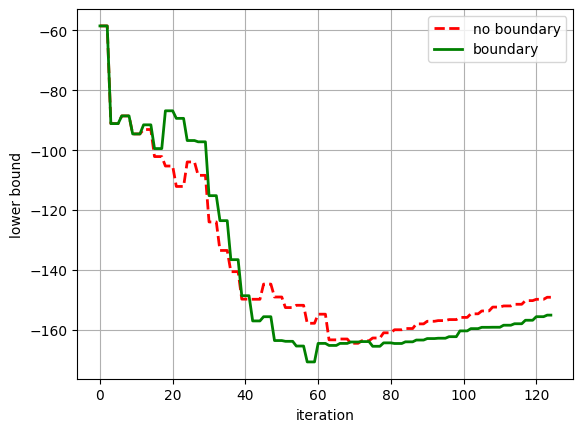

In [56]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Ackley6D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')


median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/Ackley7.png')

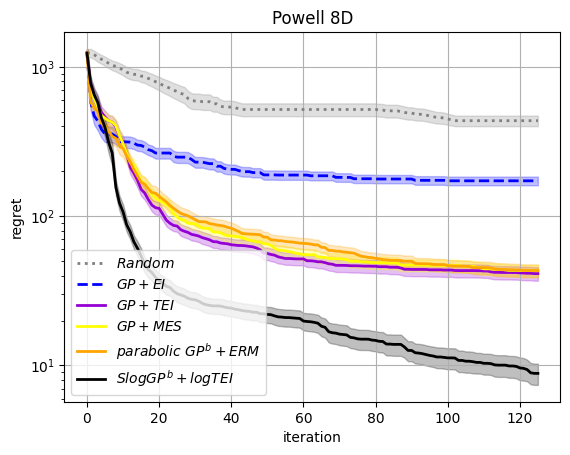

In [16]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  0.

log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.xlabel('iteration')
plt.ylabel('regret')
plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Powell 8D')

plt.savefig('plots/Powell5.png')

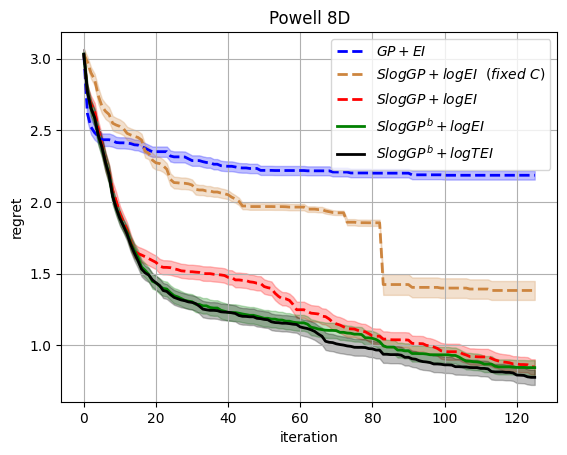

In [28]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar =  0.


log_Regret_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_Regret_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_Regret_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)


plt.xlabel('iteration')
plt.ylabel('regret')
#plt.yscale("log") 
plt.grid()

plt.legend()
plt.title('Powell 8D')

plt.savefig('plots/Powell6.png')

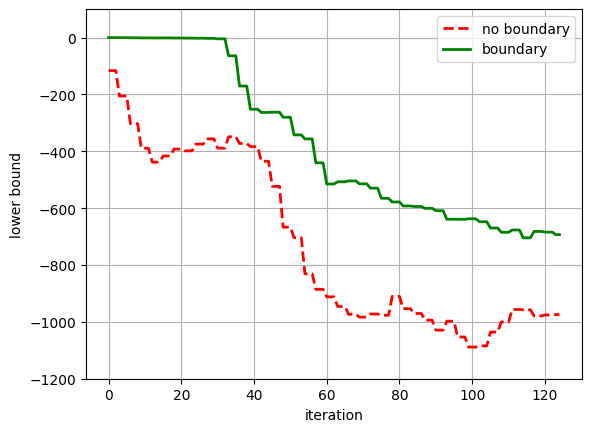

In [58]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Powell8D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')

median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.ylim([-1200,100])

plt.savefig('plots/Powell7.png')

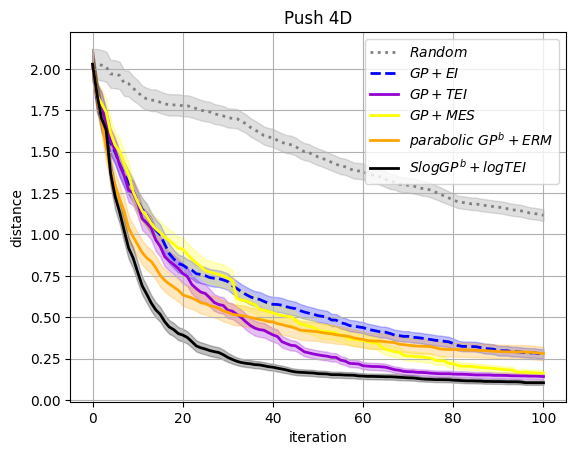

In [20]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='$GP+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.grid()
#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('distance')
plt.legend()
plt.title('Push 4D')


plt.savefig('plots/Push5.png')

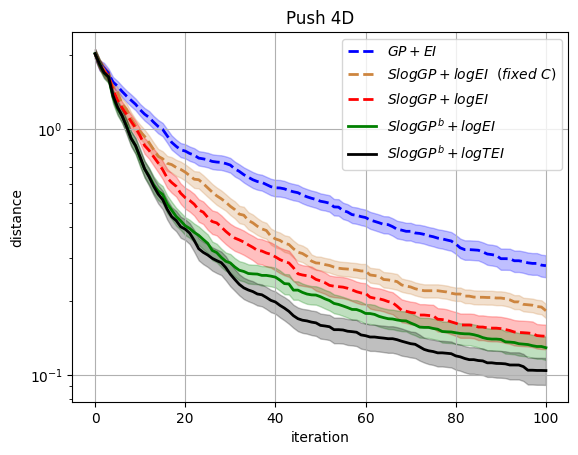

In [11]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res_first/Push4D_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.

log_RegretMean_plot(BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

plt.grid()
plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('distance')
plt.legend()
plt.title('Push 4D')

plt.savefig('plots/Push6.png')

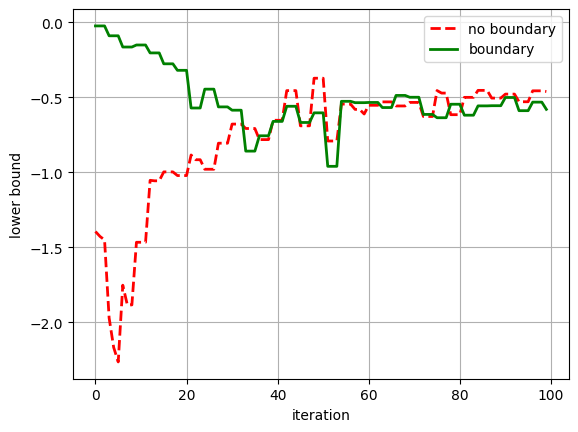

In [10]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/Push4D_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')

median = np.percentile(SLogGP_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='no boundary',color='red',linestyle='--')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='red')  


median = np.percentile(SLogGP_boundary_logEI,50,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q25 = np.percentile(SLogGP_boundary_logEI,25,axis=0) #  np.median(SLogGP_logEI,axis=0)
Q75 = np.percentile(SLogGP_boundary_logEI,75,axis=0) #  np.median(SLogGP_logEI,axis=0)
iter = np.array(range(median.shape[0]))
plt.plot(median,linewidth=2,label='boundary',color='green',linestyle='-')
#plt.fill_between(iter, Q25, Q75,alpha=0.25,color='green')  


plt.xlabel('iteration')
plt.ylabel('lower bound')

plt.grid()
plt.legend()

plt.savefig('plots/Push7.png')

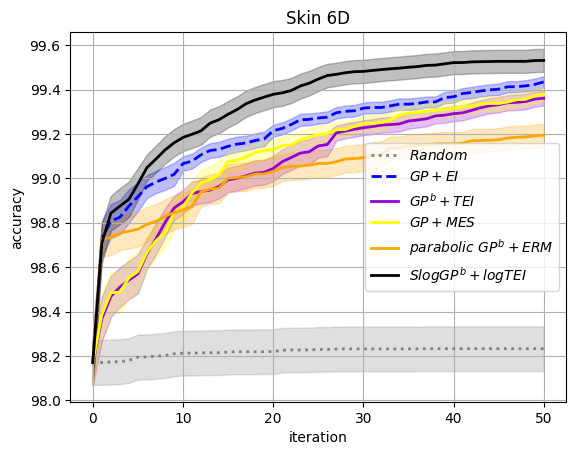

In [3]:
Random = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_Random'), delimiter=',')
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+EI'), delimiter=',')
BO_TEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+TEI'), delimiter=',')
BO_MES = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+MES'), delimiter=',')
BO_ERM = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_transformedGP+ERM'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_RegretMean_plot(100-Random,fstar=fstar,label='$Random$',color='grey',linestyle='dotted',error_bound=True)
log_RegretMean_plot(100-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-BO_TEI,fstar=fstar,label='$GP^b+TEI$',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_MES,fstar=fstar,label='$GP+MES$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(100-BO_ERM,fstar=fstar,label='$parabolic ~ GP^b+ERM$',color='orange',linestyle='-',error_bound=True)
# log_RegretMean_plot(100-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
# log_RegretMean_plot(100-SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.grid()
plt.title('Skin 6D')

plt.savefig('plots/Skin5.png')


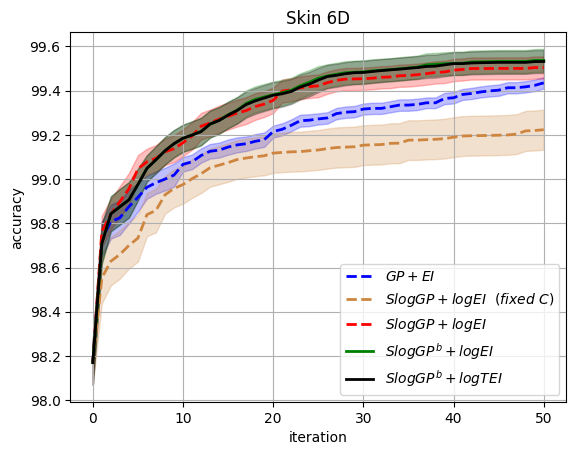

In [13]:
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_GP+EI'), delimiter=',')
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI'), delimiter=',')
SLogGP_logEI_fixedC = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_fixedC'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI'), delimiter=',')
SLogGP_boundary_logTEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logTEI'), delimiter=',')


fstar = 0.


log_RegretMean_plot(100-BO_EI,fstar=fstar,label='$GP+EI$',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_logEI_fixedC,fstar=fstar,label='$SlogGP+logEI ~~ (fixed ~ C)$',color='peru',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_logEI,fstar=fstar,label='$SlogGP+logEI$',color='red',linestyle='dashed',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logEI,fstar=fstar,label='$SlogGP^b+logEI$',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(100-SLogGP_boundary_logTEI,fstar=fstar,label='$SlogGP^b+logTEI$',color='black',linestyle='-',error_bound=True)

#plt.yscale("log") 
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.grid()
plt.title('Skin 6D')

plt.savefig('plots/skin6.png')


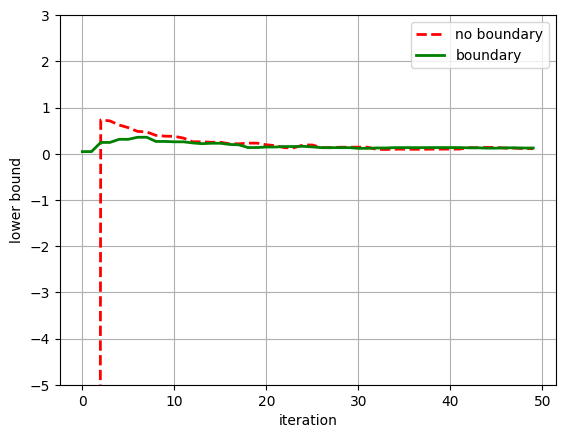

In [9]:
SLogGP_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP+logEI_boundaryValue'), delimiter=',')
SLogGP_boundary_logEI = np.genfromtxt(os.path.join(os.getcwd(),'final_res/skin_SLogGP(boundary)+logEI_boundaryValue'), delimiter=',')




median1 = np.median(SLogGP_logEI,axis=0)
median2 = np.median(SLogGP_boundary_logEI,axis=0)

iter = np.array(range(median1.shape[0]))



plt.plot(median1,linewidth=2,label='no boundary',color='red',linestyle='--')
plt.plot(median2,linewidth=2,label='boundary',color='green',linestyle='-')

plt.xlabel('iteration')
plt.ylabel('lower bound')
plt.ylim([-5,3])
plt.grid()
plt.legend()

plt.savefig('plots/Skin7.png')